<a href="https://colab.research.google.com/github/CarlChristopherson/co2emissions/blob/main/Carl_C_MATH_2315_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [1]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns 

# set the plotting style 
sns.set_style("whitegrid")

# Plot missing values
import missingno as msno

## Lab introduction

The goal of this lab was to investigate data on the current top 10 Co2 emmitters and how that data has changed over the past 50 years (1971-2020). We used the greenhouse gas emission data set owid-co2-data.csv from Our World in Data.

Link to data set: https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv

 Downloaded on 03/29/2023.
Our source, our World in Data, is a large scientific publication with lots of reputable data.

## Import and set up the data set

##### $\rightarrow$ Use Pandas to load the file `owid-co2-data.csv` from https://github.com/owid/co2-data as a `DataFrame`. Name the `DataFrame` `df`.

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv')

##### Solution

Consult the [codebook](https://github.com/owid/co2-data/blob/master/owid-co2-codebook.csv) to see the description of each column.



##### $\rightarrow$ Select the rows corresponding to individual countries 

The `country` column of the data set contains some values that are groups of countries. We will remove these observations from the data set.

In [3]:
non_countries = ['Africa', 'Africa (GCP)', 'Asia', 'Asia (GCP)', 'Asia (excl. China and India)', 'Central America (GCP)',
                  'EU-27', 'Europe', 'Europe (excl. EU-27)', 'European Union (27) (GCP)', 'Europe (GCP)',
                  'Europe (excl. EU-28)', 'European Union (27)', 
                  'European Union (28)', 'French Equatorial Africa', 
                  'French Guiana', 'French Polynesia', 'French West Africa',
                  'High-income countries', 'International transport', 
                  'Low-income countries', 'Lower-middle-income countries', 'Mayotte', 'Middle East (GCP)',
                  'Non-OECD (GCP)',
                  'North America',  'North America (excl. USA)', 'North America (GCP)',
                  'Oceania (GCP)', 'OECD (GCP)', 
                  'Panama Canal Zone','South America', 'South America (GCP)', 'Upper-middle-income countries', 
                  'World']

Remove the rows corresponding to the non-countries.

In [4]:
df = df.loc[df['country'].isin(non_countries) == False]

## Explore the data set

##### $\rightarrow$ Display the head of the data frame

##### Solution

In [5]:
df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN


##### $\rightarrow$ Use the `info` method further explore the data.
1.  Are there any columns where the data type is obviously incorrect? For example, is there a variable that should be a number, but is coded as a string?
2.  Do any of the columns have missing (null) values?

##### Solution

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39638 entries, 0 to 46522
Data columns (total 74 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    39638 non-null  object 
 1   year                                       39638 non-null  int64  
 2   iso_code                                   39251 non-null  object 
 3   population                                 36053 non-null  float64
 4   gdp                                        14535 non-null  float64
 5   cement_co2                                 20333 non-null  float64
 6   cement_co2_per_capita                      19018 non-null  float64
 7   co2                                        24464 non-null  float64
 8   co2_growth_abs                             23971 non-null  float64
 9   co2_growth_prct                            21484 non-null  float64
 10  co2_including_luc     

1. No, there are not any columns with incorrect data types.
2. Yes, almost all of the columns have null values. The country and year columns both have 39,638 data entries, indicated 39,638 rows. No other column has that many non-null entries so they must have null entries.

##### $\rightarrow$ What years are present in the data set?

In [6]:
df['year'].unique()

array([1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860,
       1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871,
       1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882,
       1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893,
       1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904,
       1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915,
       1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926,
       1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937,
       1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 20

## Analysis of top emissions in 2020

##### $\rightarrow$ Find the top 10 emitters of total CO$_2$ in 2020.



##### Solution

In [7]:
co2_2020 = df.loc[df['year'] == 2020, ['country', 'co2']]

In [8]:
co2_2020 = co2_2020.sort_values(by='co2', ascending=False)

In [9]:
top_10 = co2_2020.iloc[0:10]

In [11]:
print(top_10)

             country        co2
8989           China  10956.213
44221  United States   4715.691
20136          India   2445.012
35053         Russia   1624.221
21756          Japan   1042.224
20552           Iran    729.978
36664   Saudi Arabia    661.193
16794        Germany    639.381
20308      Indonesia    609.786
39259    South Korea    597.634


##### $\rightarrow$ Make a histogram of total CO$_2$ emissions in 2020. Make the plot on a density scale.

##### Solution

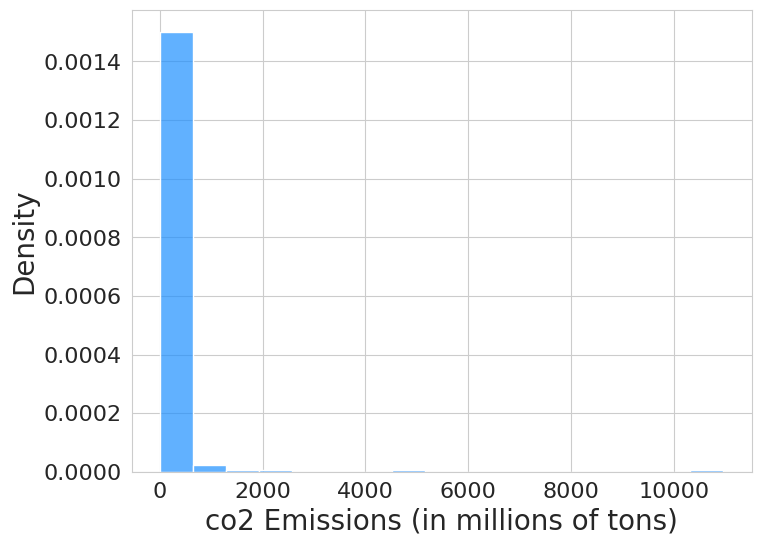

In [10]:
plt.figure(figsize = (8,6))

sns.histplot(data = df[df['year'] == 2020], x = 'co2', bins = 17, color = 'dodgerblue', alpha = 0.7, stat = 'density')

plt.ylabel('Density', fontsize = 20) 
plt.xlabel('co2 Emissions (in millions of tons)', fontsize = 20)

plt.tick_params(labelsize = 16);

##### $\rightarrow$ Make a boxplot of total CO$_2$ emissions in 2020. Add a strip plot on top of the boxplot.

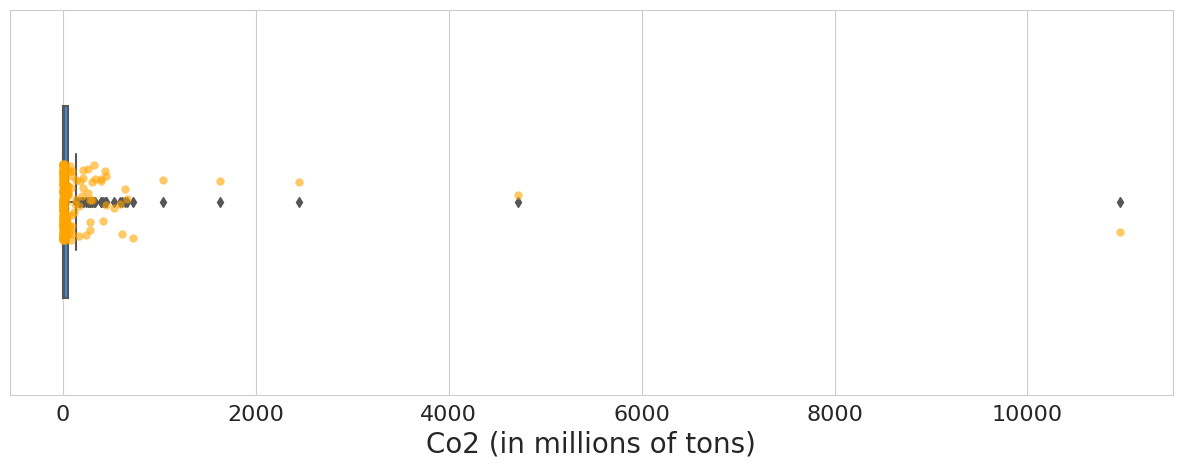

In [11]:
plt.figure(figsize = (15,5))

sns.boxplot(data = df[df['year'] == 2020], x = 'co2', color = 'dodgerblue', width = 0.5)

sns.stripplot(data = df[df['year'] == 2020], x = 'co2', color = 'orange', size = 6, alpha = 0.6)

plt.xlabel('Co2 (in millions of tons)',fontsize = 20)

plt.tick_params(labelsize = 16);

##### $\rightarrow$ Are the CO$_2$ emissions of the top 10 emitters in 2020 outliers in the distribution?

Yes absolutely they are. This is most visually drastic on the historgram plot, with the US and China significantly higher than all of the rest of the data.

## Emission trend over time

##### $\rightarrow$ Is the data set missing any CO$_2$ emission values for the top 10 emitters in 2020 over the years 1971 to 2020?

In [12]:
df_co2 = df[['country', 'year', 'co2']]

In [13]:
df_co2_1971 = df_co2.loc[df['year'].between(1971,2020)]

In [14]:
df_top10_71 = df_co2_1971.loc[df['country'].isin(['United States', 'China', 'Saudi Arabia', 'Germany', 'South Korea', 'Iran', 'Japan', 'Russia', 'India', 'Indonesia'])]

In [15]:
df_top10_71.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 8940 to 44221
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  500 non-null    object 
 1   year     500 non-null    int64  
 2   co2      500 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 15.6+ KB


No, none of them are missing any co2 emission data values.

##### $\rightarrow$ Plot the time plot of the total CO$_2$ emissions from 1971 to 2020 for the top 10 emitters in 2020.

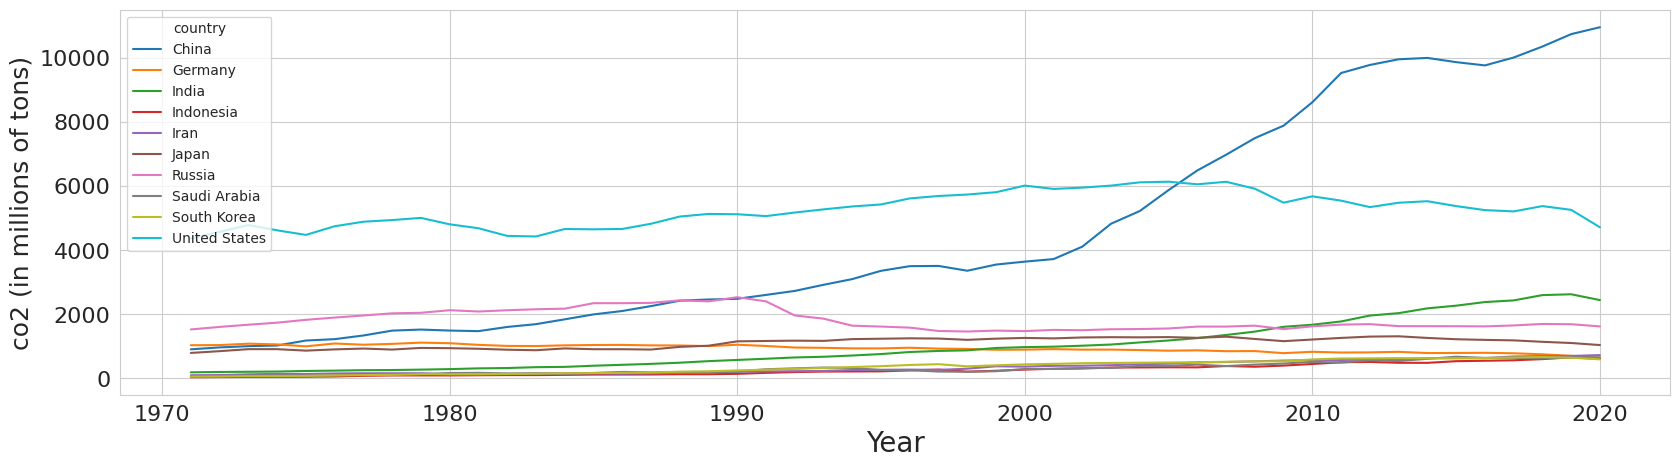

In [16]:
plt.figure(figsize = (20,5))
sns.lineplot(data = df_top10_71, x = 'year', y = 'co2', hue = 'country')

plt.xlabel('Year', fontsize = 20)
plt.ylabel('co2 (in millions of tons)', fontsize = 18)

# Set sizes of tick labels
plt.tick_params(labelsize = 16);


##### $\rightarrow$ Again, plot the time plot of the total CO$_2$ emissions from 1971 to 2020 for the top 10 emitters in 2020, but now also include a plot of the mean total CO$_2$ emissions over all countries on the same plot.

##### Solution

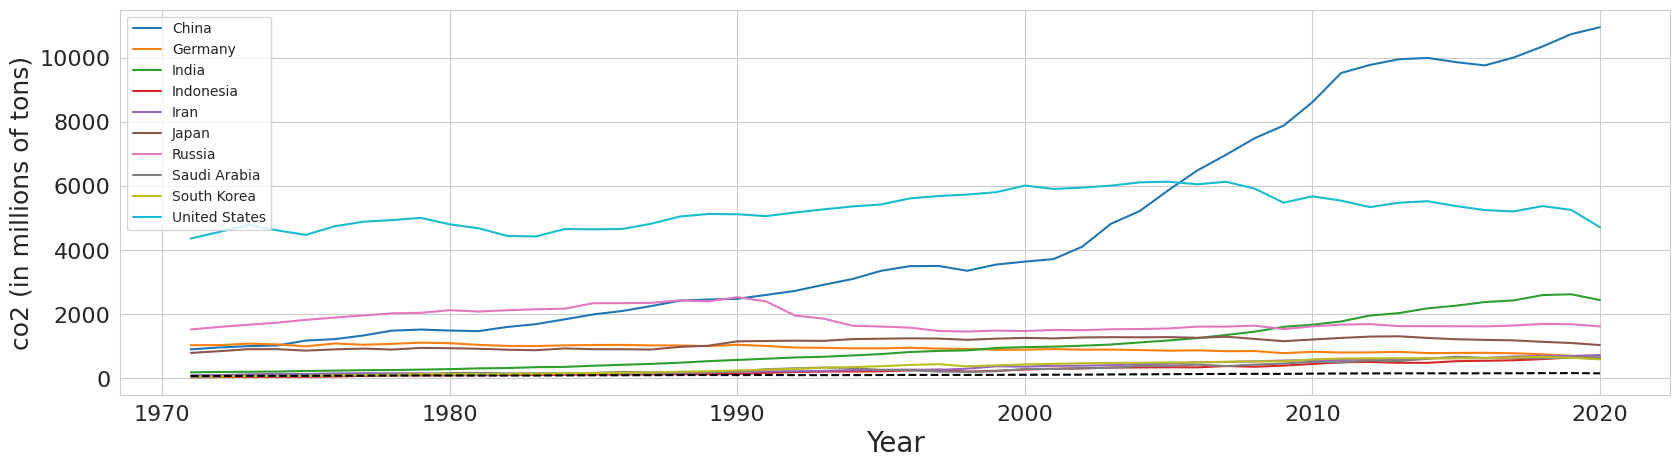

In [17]:
plt.figure(figsize = (20,5))
sns.lineplot(data = df_top10_71, x = 'year', y = 'co2', hue = 'country')
sns.lineplot(data = df_co2_1971[['year', 'co2']]. groupby('year').mean(), x = 'year', y = 'co2', color = 'k', linestyle = '--')

plt.xlabel('Year', fontsize = 20)
plt.ylabel('co2 (in millions of tons)', fontsize = 18)

plt.tick_params(labelsize = 16);

##### $\rightarrow$ Given the large difference between the smallest and largest values, it can help to plot the results on a log scale. Produce the plot of the top 10 emitters and the mean with CO$_2$ emissions on a log scale.

##### Solution

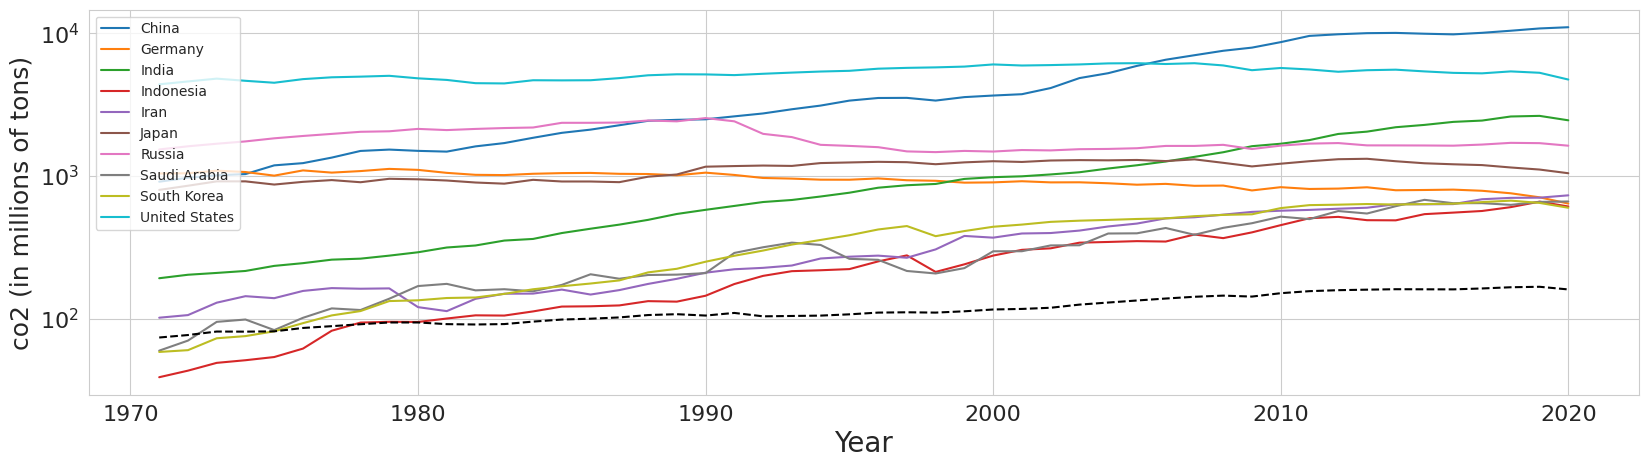

In [18]:
plt.figure(figsize = (20,5))
sns.lineplot(data = df_top10_71, x = 'year', y = 'co2', hue = 'country')
sns.lineplot(data = df_co2_1971[['year', 'co2']]. groupby('year').mean(), x = 'year', y = 'co2', color = 'k', linestyle = '--')

plt.xlabel('Year', fontsize = 20)
plt.ylabel('co2 (in millions of tons)', fontsize = 18)

plt.yscale('log')

plt.tick_params(labelsize = 16);

##### $\rightarrow$ Comment on the trend in CO$_2$ emissions from these countries over the last 50 years.

The general trend in Co2 emissions increasing worldwide is due in large part to just these top 10 countries, and even more specifically the top 2 countries most of all. All 9 except for China have remained consistent since 1971, while China had increased 10 fold.